## Data Mining Assignment 2

#### Nikita Jaikar
#### 71620044
#### 9th April' 2017


### Question ONE:

In [233]:
import os
os.getcwd()

'C:\\Users\\home\\Canopy'

##### Step 1: 
Download the data on cosmetics purchases (Cosmetics.xls) from the textbook website (http://dataminingbook.com/).

In [187]:
from orangecontrib.associate.fpgrowth import *
import pandas as pd

In [189]:
data=pd.read_excel('E:/Data Mining/Assignment 2/Cosmetics.xlsx',1)
data.head()

,Trans.,Bag,Blush,Nail Polish,Brushes,Concealer,Eyebrow Pencils,Bronzer,Lip liner,Mascara,Eye shadow,Foundation,Lip Gloss,Lipstick,Eyeliner
0,1,0,1,1,1,1,0,1,1,1,0,0,0,0,1
1,2,0,0,1,0,1,0,1,1,0,0,1,1,0,0
2,3,0,1,0,0,1,1,1,1,1,1,1,1,1,0
3,4,0,0,1,1,1,0,1,0,0,0,1,0,0,1
4,5,0,1,0,0,1,0,1,1,1,1,0,1,1,0


#### Step 2: 
Using XLMiner, R, or any other tool you are familiar with, apply association rules to these data. You may choose the threshold support and confidence in such a way that you get approximately15-20 rules with, at least, a few of them with Lift Ratio greater than 1.

In [191]:
#Association Mining 
Bags_itemset = data.ix[:,'Bag':].values==1
itemsets = dict(frequent_itemsets(Bags_itemset, .003))
rules = association_rules(itemsets, .90)
StatsRules=list(rules_stats(rules, itemsets, 14))
OutputValues=[(a,b,c,d,g) for a,b,c,d,e,f,g,h in StatsRules]

In [198]:
namesOutput=['atecedent','consequent','support','confidence','lift']
DF_Output=pd.DataFrame(OutputValues,columns=namesOutput)
DF_Output=DF_Output.sort(['lift'],ascending=False).reset_index(drop=True)
DF_Output=DF_Output.head(20)
DF_Output['atecedentValues']='blank'
DF_Output['consequentValues']='blank'

C:\Users\home\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [199]:
for index,t in DF_Output['atecedent'].iteritems():
    p=[i for i in list(t)]
    DF_Output['atecedentValues'][index]=list(data.columns[1:][p])

for index,t in DF_Output['consequent'].iteritems():
    p=[i for i in list(t)]
    DF_Output['consequentValues'][index]=list(data.columns[1:][p])

C:\Users\home\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\home\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [201]:
sum(DF_Output['lift']>1)

6

#### After tuning, i am getting lift ratio greater than 1

#### Consider the result of the association rules analysis to answer the following questions.

a) Please include (copy-paste) the output ─ first fifteen rules along with header and input parameter details ─ in your submission.

In [205]:
DF_Output=DF_Output.sort(['lift'],ascending=False).reset_index(drop=True)

C:\Users\home\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [207]:
DF_Output.head(15)

,atecedent,consequent,support,confidence,lift,atecedentValues,consequentValues
0,"(4, 5, 6, 8, 11)","(1, 7, 9, 10, 12)",3,1.0,1.272727,"[Concealer, Eyebrow Pencils, Bronzer, Mascara,...","[Blush, Lip liner, Eye shadow, Foundation, Lip..."
1,"(4, 5, 6, 9, 11)","(1, 7, 8, 10, 12)",3,1.0,1.272727,"[Concealer, Eyebrow Pencils, Bronzer, Eye shad...","[Blush, Lip liner, Mascara, Foundation, Lipstick]"
2,"(8, 2, 5, 7)","(1, 3, 4, 6, 9, 12)",3,1.0,1.166667,"[Mascara, Nail Polish, Eyebrow Pencils, Lip li...","[Blush, Brushes, Concealer, Bronzer, Eye shado..."
3,"(9, 2, 5, 7)","(1, 3, 4, 6, 8, 12)",3,1.0,1.166667,"[Eye shadow, Nail Polish, Eyebrow Pencils, Lip...","[Blush, Brushes, Concealer, Bronzer, Mascara, ..."
4,"(2, 4, 5, 8, 11)","(1, 3, 9, 10, 12)",3,1.0,1.076923,"[Nail Polish, Concealer, Eyebrow Pencils, Masc...","[Blush, Brushes, Eye shadow, Foundation, Lipst..."
5,"(2, 4, 5, 9, 11)","(1, 3, 8, 10, 12)",3,1.0,1.076923,"[Nail Polish, Concealer, Eyebrow Pencils, Eye ...","[Blush, Brushes, Mascara, Foundation, Lipstick]"
6,"(9, 2, 5, 7)","(1, 3, 6, 8, 12)",3,1.0,1.000000,"[Eye shadow, Nail Polish, Eyebrow Pencils, Lip...","[Blush, Brushes, Bronzer, Mascara, Lipstick]"
7,"(8, 2, 5, 7)","(1, 3, 6, 9, 12)",3,1.0,1.000000,"[Mascara, Nail Polish, Eyebrow Pencils, Lip li...","[Blush, Brushes, Bronzer, Eye shadow, Lipstick]"
8,"(2, 4, 5, 7, 8)","(1, 3, 6, 9, 12)",3,1.0,1.000000,"[Nail Polish, Concealer, Eyebrow Pencils, Lip ...","[Blush, Brushes, Bronzer, Eye shadow, Lipstick]"
9,"(9, 2, 5, 7)","(1, 3, 4, 8, 12)",3,1.0,1.000000,"[Eye shadow, Nail Polish, Eyebrow Pencils, Lip...","[Blush, Brushes, Concealer, Mascara, Lipstick]"


#### Rules used support is 0.3% and confidence 90%

b) What are the supports of the antecedent, the consequent, and the support of the rule itself for the first rule? Explain how they are calculated. 

In [208]:
DF_Output.to_csv("E:/Data Mining/Assignment 2/AssociativeOutput.csv")

The support for antecedent in the first rule is 3 and the support for consequent in the first rule is 12 , the combined support for the rule is 3

#### Support of Antecedent 

For Antecedent, filter our data by keeping the first set such as (concealer,eyebrow pencils,bronzer, mascara and lip gloss) to be 1. I am getting count of 3 as we can see in below dataframe

In [210]:
df_Antecedent = data.loc[(data['Concealer'] == 1) & (data['Eyebrow Pencils'] == 1) & (data['Bronzer'] == 1) & (data['Mascara'] == 1) & (data['Lip Gloss'] == 1), ['Bag','Blush','Nail Polish','Brushes', 'Concealer', 'Eyebrow Pencils','Bronzer','Lip liner','Mascara','Eye shadow','Foundation','Lip Gloss','Lipstick','Eyeliner']]
df_Antecedent.head(10)

,Bag,Blush,Nail Polish,Brushes,Concealer,Eyebrow Pencils,Bronzer,Lip liner,Mascara,Eye shadow,Foundation,Lip Gloss,Lipstick,Eyeliner
2,0,1,0,0,1,1,1,1,1,1,1,1,1,0
20,0,1,0,0,1,1,1,1,1,1,1,1,1,1
79,0,1,1,1,1,1,1,1,1,1,1,1,1,0


#### Support of Consequent

For Consequent, filter our data by keeping the first set such as (Blush,lipliner,eyeshadow,foundation, and lipstick) to be 1. As we can see in below dataframe am getting the count of 11

In [211]:
df_Consequent = data.loc[(data['Blush'] == 1) & (data['Lip liner'] == 1) & (data['Eye shadow'] == 1) & (data['Foundation'] == 1) & (data['Lipstick'] == 1), ['Bag','Blush','Nail Polish','Brushes', 'Concealer', 'Eyebrow Pencils','Bronzer','Lip liner','Mascara','Eye shadow','Foundation','Lip Gloss','Lipstick','Eyeliner']]
df_Consequent.head(15)

,Bag,Blush,Nail Polish,Brushes,Concealer,Eyebrow Pencils,Bronzer,Lip liner,Mascara,Eye shadow,Foundation,Lip Gloss,Lipstick,Eyeliner
2,0,1,0,0,1,1,1,1,1,1,1,1,1,0
13,0,1,1,1,1,0,1,1,1,1,1,1,1,0
14,0,1,0,0,1,0,1,1,1,1,1,1,1,1
20,0,1,0,0,1,1,1,1,1,1,1,1,1,1
27,1,1,1,1,1,0,1,1,1,1,1,1,1,1
42,0,1,1,0,1,0,1,1,1,1,1,1,1,1
79,0,1,1,1,1,1,1,1,1,1,1,1,1,0
143,0,1,1,0,1,0,1,1,1,1,1,1,1,0
281,0,1,0,0,0,0,1,1,1,1,1,1,1,0
439,0,1,0,0,1,1,0,1,1,1,1,0,1,1


#### Support for the rule 

The support for the rule is common transactions between consequent and antecedent I am getting the count as 3

In [212]:
df_Antecedent

,Bag,Blush,Nail Polish,Brushes,Concealer,Eyebrow Pencils,Bronzer,Lip liner,Mascara,Eye shadow,Foundation,Lip Gloss,Lipstick,Eyeliner
2,0,1,0,0,1,1,1,1,1,1,1,1,1,0
20,0,1,0,0,1,1,1,1,1,1,1,1,1,1
79,0,1,1,1,1,1,1,1,1,1,1,1,1,0


c) What is the confidence of the first rule? Explain how it is calculated. 

Confidence = Support (antecedent+ consequent)*100/Support (antecedent)

           = 3*100/3
           
           =100 percent
           

d) What is the lift ratio of the first rule? Explain how it is calculated. 

Lift Ratio: 1.2 lift ratio is calculated as,
 
         = confidence/expected confidence
         
         = (12*100/1000)/100
         
         =1.2


e) Reviewing the first fifteen rules, comment on their redundancy (read as constructed from same item set/tuple). How many unique rules did you find from the first 15 rules? 

Most of the rules are redundant, distinct rules are only three

f) Interpret the first three distinct (i.e., excluding the redundant ones, if any, as defined above) rules, in the output, in words

In [224]:
#np.unique(df[['Col1', 'Col2']])
np.unique(DF_Output[['consequentValues', 'atecedentValues']])

array([['Blush', 'Brushes', 'Bronzer', 'Eye shadow', 'Lipstick'],
       ['Blush', 'Brushes', 'Bronzer', 'Mascara', 'Lipstick'],
       ['Blush', 'Brushes', 'Concealer', 'Bronzer', 'Eye shadow', 'Lipstick'],
       ['Blush', 'Brushes', 'Concealer', 'Bronzer', 'Lipstick'],
       ['Blush', 'Brushes', 'Concealer', 'Bronzer', 'Mascara', 'Lipstick'],
       ['Blush', 'Brushes', 'Concealer', 'Eye shadow', 'Lipstick'],
       ['Blush', 'Brushes', 'Concealer', 'Mascara', 'Lipstick'],
       ['Blush', 'Brushes', 'Eye shadow', 'Foundation', 'Lipstick'],
       ['Blush', 'Brushes', 'Mascara', 'Foundation', 'Lipstick'],
       ['Blush', 'Concealer', 'Bronzer', 'Mascara', 'Foundation', 'Lipstick'],
       ['Blush', 'Concealer', 'Eyebrow Pencils', 'Bronzer', 'Eye shadow', 'Lip Gloss'],
       ['Blush', 'Concealer', 'Eyebrow Pencils', 'Bronzer', 'Mascara', 'Lip Gloss'],
       ['Blush', 'Lip liner', 'Eye shadow', 'Foundation', 'Lipstick'],
       ['Blush', 'Lip liner', 'Mascara', 'Foundation', 'Lips

#### Inferrence: -  Lips related and eyes related cosetic is present in both ancedent and consedent

g) Based on the distinct rules that you identified in Part (f), suggest some action that’ll benefit the business owner.

We are getting rules which having mostly lips and eyes related cosmetics.  

The business approach would be to group picking two products related to eye make up and two products related to lips and bundle them to promote higher sales.


### Question TWO:

#### Step 1: Download (1) airports.dat, (2) airlines.dat, and (3) routes.dat from http://openflights.org/data.html

Refer to the data descriptions provided on the site itself. You may use the R scripts shown in class (also uploaded on LMS), or any other software packages that you are familiar with in order to complete the exercise.

In [186]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [142]:
# Read in the airports data.
airports = pd.read_csv("E:/Data Mining/Assignment 2/Airports.csv", header=None, dtype=str, encoding = "ISO-8859-1")
airports.columns = ["id", "name", "city", "country", "code", "icao", "latitude", "longitude", "altitude", "offset", "dst", "timezone", "type", "source"]
                    

# Read in the airlines data.
airlines = pd.read_csv("E:/Data Mining/Assignment 2/Airlines.csv", header=None, dtype=str, encoding = "ISO-8859-1")
airlines.columns = ["id", "name", "alias", "iata", "icao", "callsign", "country", "active"]

# Read in the routes data.
routes = pd.read_csv("E:/Data Mining/Assignment 2/Routes.csv", header=None, dtype=str, encoding = "ISO-8859-1")
routes.columns = ["airline", "airline_id", "source", "source_id", "dest", "dest_id", "codeshare", "stops", "equipment"]

In [143]:
airports.head()

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081689835,145.3919983,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207079887,145.7890015,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789856,144.2960052,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380356,147.2200012,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [144]:
airlines.head()

,id,name,alias,iata,icao,callsign,country,active
0,-1,Unknown,\N,-,NaN,\N,\N,Y
1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N


In [145]:
routes.head()

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [146]:
routes = routes[routes["airline_id"] != "\\N"]

In [147]:
import math

def haversine(lon1, lat1, lon2, lat2):
    # Convert coordinates to floats.
    lon1, lat1, lon2, lat2 = [float(lon1), float(lat1), float(lon2), float(lat2)]
    # Convert to radians from degrees.
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    # Compute distance.
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    km = 6367 * c
    return km

In [148]:
def calc_dist(row):
    dist = 0
    try:
        # Match source and destination to get coordinates.
        source = airports[airports["id"] == row["source_id"]].iloc[0]
        dest = airports[airports["id"] == row["dest_id"]].iloc[0]
        # Use coordinates to compute distance.
        dist = haversine(dest["longitude"], dest["latitude"], source["longitude"], source["latitude"])
    except (ValueError, IndexError):
        pass
    return dist

In [149]:
route_lengths = routes.apply(calc_dist, axis=1)

C:\Users\home\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


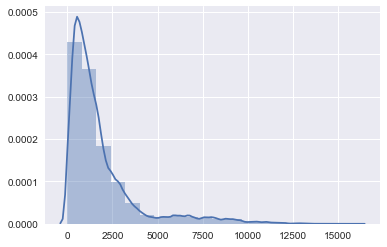

In [156]:
import seaborn
seaborn.distplot(route_lengths, bins=20)

In [153]:
import numpy as np
# Put relevant columns into a dataframe.
route_length_df = pd.DataFrame({"length": route_lengths, "id": routes["airline_id"]})
# Compute the mean route length per airline.
airline_route_lengths = route_length_df.groupby("id").aggregate(np.mean)
# Sort by length so we can make a better chart.
airline_route_lengths = airline_route_lengths.sort("length", ascending=False)

C:\Users\home\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


<Container object of 547 artists>

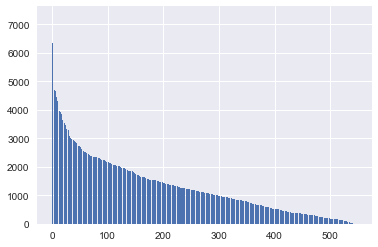

In [157]:
plt.bar(range(airline_route_lengths.shape[0]), airline_route_lengths["length"])

In [158]:
def lookup_name(row):
    try:
        # Match the row id to the id in the airlines dataframe so we can get the name.
        name = airlines["name"][airlines["id"] == row["id"]].iloc[0]
    except (ValueError, IndexError):
        name = ""
    return name

# Add the index (the airline ids) as a column.
airline_route_lengths["id"] = airline_route_lengths.index.copy()
# Find all the airline names.
airline_route_lengths["name"] = airline_route_lengths.apply(lookup_name, axis=1)
# Remove duplicate values in the index.
airline_route_lengths.index = range(airline_route_lengths.shape[0])

In [159]:
import numpy as np
from bokeh.io import output_notebook
from bokeh.charts import Bar, show

output_notebook()
p = Bar(airline_route_lengths, 'name', values='length', title="Average airline route lengths")
show(p)

Loading BokehJS ...

In [160]:
long_routes = len([k for k in route_lengths if k > 10000]) / len(route_lengths)
medium_routes = len([k for k in route_lengths if k < 10000 and k > 2000]) / len(route_lengths)
short_routes = len([k for k in route_lengths if k < 2000]) / len(route_lengths)

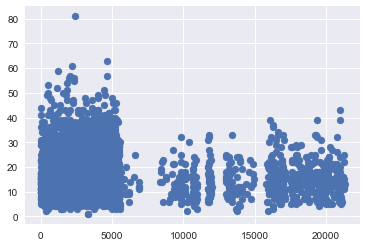

In [162]:
name_lengths = airlines["name"].apply(lambda x: len(str(x)))
plt.scatter(airlines["id"].astype(int), name_lengths)

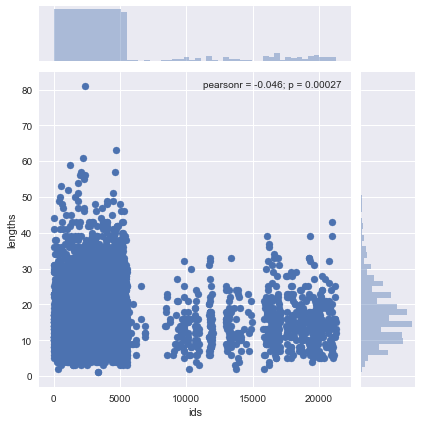

In [164]:
data = pd.DataFrame({"lengths": name_lengths, "ids": airlines["id"].astype(int)})
seaborn.jointplot(x="ids", y="lengths", data=data)

In [165]:
# Initialize the weights dictionary.
weights = {}
# Keep track of keys that have been added once -- we only want edges with a weight of more than 1 to keep our network size manageable.
added_keys = []
# Iterate through each route.
for name, row in routes.iterrows():
    # Extract the source and dest airport ids.
    source = row["source_id"]
    dest = row["dest_id"]
    
    # Create a key for the weights dictionary.
    # This corresponds to one edge, and has the start and end of the route.
    key = "{0}_{1}".format(source, dest)
    # If the key is already in weights, increment the weight.
    if key in weights:
        weights[key] += 1
    # If the key is in added keys, initialize the key in the weights dictionary, with a weight of 2.
    elif key in added_keys:
        weights[key] = 2
    # If the key isn't in added_keys yet, append it.
    # This ensures that we aren't adding edges with a weight of 1.
    else:
        added_keys.append(key)

### Step 2: Create a directed network graph of airline routes using routes.dat

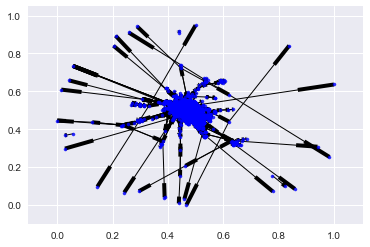

In [178]:
# Import networkx and initialize the graph.
import networkx as nx
graph = nx.DiGraph()
graph_undirectional = nx.Graph()
# Keep track of added nodes in this set so we don't add twice.
nodes = set()
# Iterate through each edge.
for k, weight in weights.items():
    try:
        # Split the source and dest ids and convert to integers.
        source, dest = k.split("_")
        source, dest = [int(source), int(dest)]
        # Add the source if it isn't in the nodes.
        if source not in nodes:
            graph.add_node(source)
        # Add the dest if it isn't in the nodes.
        if dest not in nodes:
            graph.add_node(dest)
        # Add both source and dest to the nodes set.
        # Sets don't allow duplicates.
        nodes.add(source)
        nodes.add(dest)
        
        # Add the edge to the graph.
        graph.add_edge(source, dest, weight=weight)
    except (ValueError, IndexError):
        pass

pos=nx.spring_layout(graph)

# Draw the nodes and edges.
nx.draw_networkx_nodes(graph,pos, node_color='blue', node_size=10, alpha=0.8)
nx.draw_networkx_edges(graph,pos,width=1.0,alpha=1)

# Show the plot.
plt.show()

#### Step 3: Create community-based clusters. If you are using R, choose leading.eigenvector approach. If you are using any other software, use the equivalent algorithm provided with the software.

Followings Quetions Solved in R.
snippet is below:

airports <- read.csv("E:/Data Mining/Assignment 2/airports.dat", header=FALSE) ## source: http://openflights.org/data.html
colnames(airports) <- c("Airport ID","Name","City","Country","IATA_FAA","ICAO","Latitude","Longitude","Altitude","Timezone","DST","Tz database timezone")
head(airports)

airline_routes <- read.csv("E:/Data Mining/Assignment 2/routes.dat", header=FALSE) ## source: http://openflights.org/data.html
colnames(airline_routes) <- c("Airline", "Airline ID", "Source Airport","Source Airport ID","Destination Airport","Destination Airport ID","Codeshare","Stops","Equipment")
head(airline_routes)


AirlineNW <- graph.edgelist(as.matrix(airline_routes[,c(3,5)]), directed=TRUE)
plot(AirlineNW)

A <- leading.eigenvector.community(UndirectedAirlineNW)

max(membership(A))

[1] 25

The maximum number of communities are 25

#### Step 4: Answer the following questions.

#### (a) What would you call a community in a social-media network? Intuitive, qualitative answers are expected/acceptable.

Social networks, is the groups of friends, relatives, coworkers and acquaintances that we speak to and see on a regular basis.. This is the key to Social Networks, they revolve around a group of people you already know or have already met. Social networks are inherently unique to each and every person who has one for this very reason.

Communities in a social media is that communities form out of groups of people from all different backgrounds and histories. these are the most interesting to study because they consist of people who probably have never met yet are held together by a common interest or goal. People join communities on social media for all sorts of reasons, for the similar things or a similar lifestyle.

#### b) Extend the definition of community (as you suggested above in Part a) to the community of airports

Similarly in communities in airport, people dont know each other still they belong to the same community because of their source or destination location or the sirlines

As I mentioned in my above section in part a, Communities in a social media belong to same community because of their interest or the lifestyle.

#### (c) How many distinct airports are there in the dataset? How many communities of airports got identified? List the number of airports in each cluster/community in a table.

Airports can be broadly categorized into below communities.

1. Domestic or International Airports
2. Commerical or Non-Commercial Airports
3. Civil or Non Civil Airports
4. Primary or secondary Airports


(c) How many distinct airports are there in the dataset? How many communities of airports got identified? List the number of airports in each cluster/community in a table.

length(unique(AAA$names))

## [1] 3425

#### Step 5: Compute the centralities (in-degree, out-degree, in-closeness, eigenvector, betweenness) of each airport. Now, run k-Means clustering to group the airports based on their centralities alone. Take k as the number of communities you obtained in Part c, above.

comm <- membership(AAA)

table(comm)

comm
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24 
137   2   4   2   4   2   4  10 635 340 776 334 274   1   6   1   2  21 198 656   1   1   1   1 
 25 
 12 

* In-Degree

indegree <- degree(AirlineNW,mode="in")
max(indegree)

#### [1] 911

head(indegree)

#### AER KZN ASF MRV CEK OVB 
 26  28   8  22  20  90 

* Out-Degree

outdegree <- degree(AirlineNW,mode="out")
> max(outdegree)

#### [1] 915

> head(outdegree)

#### AER KZN ASF MRV CEK OVB 
#### 26  28   8  22  20  87 

* In-Closeness

> closeness_in <- closeness(AirlineNW, mode="in",normalized = TRUE)
> max(closeness_in)
#### [1] 0.01835305

> head(closeness_in)

####       AER        KZN        ASF        MRV        CEK        OVB 
0.01801138 0.01801868 0.01796951 0.01805165 0.01797724 0.01813761 

* Eigenvector

> indegree <- degree(AirlineNW,mode="in")
> max(indegree)

[1] 911

> head(indegree)

AER KZN ASF MRV CEK OVB 
 26  28   8  22  20  90 

pg_rank <- page_rank(AirlineNW,damping = 0)
pg_rank$vector

max(pg_rank$vector)

#### [1] 0.0002919708

### k-Means clustering

setwd("E:/Data Mining/Assignment 2")
airports <- read.csv("airports.csv",header=FALSE) ## source: http://openflights.org/data.html
colnames(airports) <- c("Airport ID","Name","City","Country","IATA_FAA","ICAO","Latitude","Longitude","Altitude","Timezone","DST","Tz database timezone")

setwd("E:/Data Mining/Assignment 2")
airline_routes <- read.csv("routes.csv",header=FALSE) ## source: http://openflights.org/data.html
colnames(airline_routes) <- c("Airline", "Airline ID", "Source Airport","Source Airport ID","Destination Airport","Destination Airport ID","Codeshare","Stops","Equipment")

AirlineNW <- graph.edgelist(as.matrix(airline_routes[,c(3,5)]),directed=TRUE)

indegree <- degree(AirlineNW,mode="in")
outdegree <- degree(AirlineNW,mode="out")
closeness_in <- closeness(AirlineNW, mode="in",normalized = TRUE)
btwn <- betweenness(AirlineNW,normalized = TRUE)

centralities <- cbind(indegree,outdegree,closeness_in,btwn)

normalized_data <- scale(centralities)

fit <- kmeans(normalized_data, 25) # 3 cluster solution

fit


Within cluster sum of squares by cluster:
 [1]   8.8787815   2.7081298   4.5286978   1.4041249  58.5233522   6.6382996   9.8059306
 [8]   8.2261973   0.7304670   0.3868652  16.9773016   1.1249254   2.0068893   1.4796060
[15]  49.4401768 167.8981048  51.2281176  13.5942763   5.6999398   7.8556135  34.1979692
[22]   1.3787748   0.7401357   6.7776807   1.9803488
 (between_SS / total_SS =  96.6 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss" "betweenss"   
[7] "size"         "iter"         "ifault"      
> 

##### (d) Do you observe the groups obtained in Step 4 to be similar to or different from what you obtained in Step 5? Why?

#Difference
sum(fit$cluster==membership(AAA)) 

[1] 243

### Step 6: Carefully observe the centralities of the airports in the dataset.

#### (e) Identify a few (3-4) airports that you already know of to some extent in terms of their characteristics. Explain how centralities of those airports relative to that of the other airports in the network are in line with the characteristics you already know of about those airports.

head(centralities)

    indegree outdegree closeness_in         btwn fit.cluster
AER       26        26   0.01801138 2.057750e-05          13
KZN       28        28   0.01801868 2.211094e-05           3
ASF        8         8   0.01796951 3.970297e-07          25
MRV       22        22   0.01805165 2.315226e-05          13
CEK       20        20   0.01797724 2.473746e-06          13
OVB       90        87   0.01813761 1.385724e-03           6

#Lets take three airports 
#ATL - Hartsfield Jackson Atlanta International Airport
#LAX - Los_Angeles Airport
#FRA - Frankfurt am Main International Airport
airports[airports$IATA_FAA=="ATL",]
airports[airports$IATA_FAA=="LAX",]
airports[airports$IATA_FAA=="FRA",]

#Atlanta is the busiest international airport in the world, hence indegree and outdegree is maximum
max(indegree)
index1 <- which(indegree == max(indegree))
indegree[index1]

max(outdegree)
index2 <- which(outdegree == max(outdegree))
outdegree[index2]

# We know that Frankurt airport location is located in such a way we can travel 
max(closeness_in)
index3 <- which(closeness_in == max(closeness_in))
closeness_in[index3]

index4 <- which(btwn == max(btwn))
btwn[index4]

airports[airports$IATA_FAA=="ATL",] 

> airports[airports$IATA_FAA=="ATL",]
     Airport ID                                             Name    City       Country IATA_FAA
3468       3682 Hartsfield Jackson Atlanta International Airport Atlanta United States      ATL
     ICAO Latitude Longitude Altitude Timezone DST Tz database timezone      NA          NA
3468 KATL  33.6367  -84.4281     1026       -5   A     America/New_York airport OurAirports
> airports[airports$IATA_FAA=="LAX",]
     Airport ID                              Name        City       Country IATA_FAA ICAO Latitude
3273       3484 Los Angeles International Airport Los Angeles United States      LAX KLAX  33.9425
     Longitude Altitude Timezone DST Tz database timezone      NA          NA
3273  -118.408      125       -8   A  America/Los_Angeles airport OurAirports
> airports[airports$IATA_FAA=="FRA",]
    Airport ID                                    Name      City Country IATA_FAA ICAO Latitude
337        340 Frankfurt am Main International Airport Frankfurt Germany      FRA EDDF 50.03333
    Longitude Altitude Timezone DST Tz database timezone      NA          NA
337  8.570556      364        1   E        Europe/Berlin airport OurAirports
> max(indegree)
[1] 911
> index1 <- which(indegree == max(indegree))
> indegree[index1]
ATL 
911 
> max(outdegree)
[1] 915
> index2 <- which(outdegree == max(outdegree))
> outdegree[index2]
ATL 
915 
> max(closeness_in)
[1] 0.01835305
> index3 <- which(closeness_in == max(closeness_in))
> closeness_in[index3]
       FRA 
0.01835305 
> index4 <- which(btwn == max(btwn))
> btwn[index4]
       LAX 
0.08826718 
> 
> airports[airports$IATA_FAA=="ATL",]
     Airport ID                                             Name    City       Country IATA_FAA
3468       3682 Hartsfield Jackson Atlanta International Airport Atlanta United States      ATL
     ICAO Latitude Longitude Altitude Timezone DST Tz database timezone      NA          NA
3468 KATL  33.6367  -84.4281     1026       -5   A     America/New_York airport OurAirports

The above results show that main airports are Hartsfield Jackson Atlanta International Airport, Los_Angeles Airport, Frankfurt am Main International Airport as they have high closeness and betweeness centrality which is quiet apt as these are the metropolitan cities of India and have majority of corporate hubs. On the other hand if the Airport in Leh, depending on the Leh topography it is opened only for couple of months in the entire year making the  usage of the airport here almost nil.

#### (f) If your organization is planning on launching a new flight service on a couple of new routes, what will that be (based on the information you have in THIS dataset alone)? Explain your answer. What other information would have helped you to make a better decision?

It's advisable to introduce the new flight between two airports which are not having direct flights i.e., not having direct edge but connected using some other nodes, the metric is that the airports which are having more between centrality.